In [1]:
#Carga de librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf

2. Agregar el archivo: diamonds.csv

In [2]:
#Carga de base de datos 
df= pd.read_csv("diamonds.csv")
df.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75


3. Aplicar las acciones de preprocesamiento pertinentes “Nulos y Outliers”

In [3]:
#Identificación de valores nulos
valornulls=df.isnull().sum()
valornulls

carat      3
cut        0
color      0
clarity    0
depth      2
table      3
price      3
x          1
y          1
z          4
dtype: int64

In [4]:
#media 
df["carat"]=df["carat"].fillna(round(df["carat"].mean(),2))
#mediana
df["depth"]=df["depth"].fillna(round(df["depth"].median(),1))
#mediana
df["table"]=df["table"].fillna(round(df["table"].median(),0))
#mediana
df["price"]=df["price"].fillna(round(df["price"].median(),2))
#media
df["x"]=df["x"].fillna(round(df["x"].median(),2))
#media
df["y"]=df["y"].fillna(round(df["y"].mean(),2))
#media
df["z"]=df["z"].fillna(round(df["z"].mean(),2))

In [5]:
#Identificación de valores nulos después de la sustitución
valornulls2=df.isnull().sum()
valornulls2

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

<Figure size 1080x576 with 0 Axes>

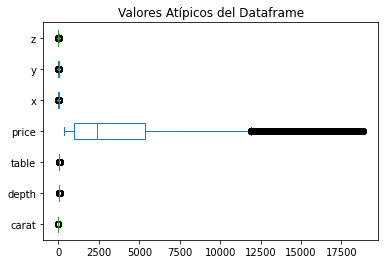

In [6]:
#Tratado de Outliers
fig = plt.figure(figsize =(15, 8))
df.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show()

In [9]:
#Desviación estandar
#Primera variable: carat
carat=df["carat"]
limitecarasuperior= carat.mean() + 3*carat.std()
limitecarainferior= carat.mean() - 3*carat.std()
print("Limite superior permitido", limitecarasuperior)
print("Limite inferior permitido", limitecarainferior)

Limite superior permitido 2.2199529087395717
Limite inferior permitido -0.6240897274270025


In [11]:
#Sustitución: carat.
df2=df[(carat<=limitecarasuperior)&(carat>=limitecarainferior)] 
df2["carat"]=df2["carat"].fillna(round(df["carat"].mean(),2))

/var/folders/nc/68rf91wx2pjbt67gbj6chn7h0000gn/T/ipykernel_30410/571952964.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["carat"]=df2["carat"].fillna(round(df["carat"].mean(),2))


In [20]:
#Desviación estandar
#Variable: depth
depth=df["depth"]
limitedepthsuperior= depth.mean() + 3*depth.std()
limitedepthinferior= depth.mean() - 3*depth.std()
print("Limite superior permitido", limitedepthsuperior)
print("Limite inferior permitido", limitedepthinferior)

Limite superior permitido 66.04722027350738
Limite inferior permitido 57.451574683852655


In [21]:
#Sustitución:depth
df2=df[(depth<=limitedepthsuperior)&(depth>=limitedepthinferior)] 
df2["depth"]=df2["depth"].fillna(round(df["depth"].median(),1))

/var/folders/nc/68rf91wx2pjbt67gbj6chn7h0000gn/T/ipykernel_30410/3001063470.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["depth"]=df2["depth"].fillna(round(df["depth"].median(),1))


In [22]:
#Desviación estandar
#Variable: table
table=df["table"]
limitetablesuperior= table.mean() + 3*table.std()
limitetableinferior= table.mean() - 3*table.std()
print("Limite superior permitido", limitetablesuperior)
print("Limite inferior permitido", limitetableinferior)

Limite superior permitido 64.16054017079666
Limite inferior permitido 50.753938880000526


In [23]:
#Sustitución:table
df2=df[(table<=limitetablesuperior)&(table>=limitetableinferior)] 
df2["table"]=df2["table"].fillna(round(df["table"].median(),0))

/var/folders/nc/68rf91wx2pjbt67gbj6chn7h0000gn/T/ipykernel_30410/3569210333.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["table"]=df2["table"].fillna(round(df["table"].median(),1))


In [32]:
#Desviación estandar
#Variable: price
price=df["price"]
limitepricesuperior= price.mean() + 3*price.std()
limitepriceinferior= price.mean() - 3*price.std()
print("Limite superior permitido", limitepricesuperior)
print("Limite inferior permitido", limitepriceinferior)

Limite superior permitido 15901.11828474277
Limite inferior permitido -8035.52625656331


In [35]:
df2=df[(price<=limitepricesuperior)&(price>=limitepriceinferior)] 
df2["price"]=df2["price"].fillna(round(df["price"].median(),2))


/var/folders/nc/68rf91wx2pjbt67gbj6chn7h0000gn/T/ipykernel_30410/764899253.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["price"]=df2["price"].fillna(round(df["price"].median(),2))


In [36]:
#Desviación estandar
#Variable: x
x=df["x"]
limitexsuperior= x.mean() + 3*x.std()
limitexinferior= x.mean() - 3*x.std()
print("Limite superior permitido", limitexsuperior)
print("Limite inferior permitido", limitexinferior)

Limite superior permitido 9.096441194396238
Limite inferior permitido 2.3658939928488483


In [37]:
#Sustitución:x
df2=df[(x<=limitexsuperior)&(x>=limitexinferior)] 
df2["x"]=df2["x"].fillna(round(df["x"].median(),2))

/var/folders/nc/68rf91wx2pjbt67gbj6chn7h0000gn/T/ipykernel_30410/140211074.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["x"]=df2["x"].fillna(round(df["x"].median(),2))


In [38]:
#Desviación estandar
#Variable: y
y=df["y"]
limiteysuperior= y.mean() + 3*y.std()
limiteyinferior= y.mean() - 3*y.std()
print("Limite superior permitido", limiteysuperior)
print("Limite inferior permitido", limiteyinferior)

Limite superior permitido 9.160929205428292
Limite inferior permitido 2.3081212209714113


In [39]:
#Sustitución:y
df2=df[(y<=limiteysuperior)&(x>=limiteyinferior)] 
df2["y"]=df2["y"].fillna(round(df["y"].mean(),2))

/var/folders/nc/68rf91wx2pjbt67gbj6chn7h0000gn/T/ipykernel_30410/733239874.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["y"]=df2["y"].fillna(round(df["y"].mean(),2))


In [40]:
#Desviación estandar
#Variable: z
z=df["z"]
limitezsuperior= z.mean() + 3*z.std()
limitezinferior= z.mean() - 3*z.std()
print("Limite superior permitido", limitezsuperior)
print("Limite inferior permitido", limitezinferior)

Limite superior permitido 5.6557964934019225
Limite inferior permitido 1.4216714339247365


In [41]:
#Sustitución:z
df2=df[(z<=limitezsuperior)&(z>=limitezinferior)] 
df2["z"]=df2["z"].fillna(round(df["z"].mean(),2))

/var/folders/nc/68rf91wx2pjbt67gbj6chn7h0000gn/T/ipykernel_30410/3631844549.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["z"]=df2["z"].fillna(round(df["z"].mean(),2))
